In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"D:\My_ML_Projs\Dimend_Price_Prediction\End-To-End-Diamond-Price-Prediction-MLFlow\notebooks\data\diamonds.csv")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
price_col = data.pop('price')
data['price'] = price_col

In [5]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [6]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64,2757


In [7]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   x           53940 non-null  float64
 8   y           53940 non-null  float64
 9   z           53940 non-null  float64
 10  price       53940 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
data = data.drop(labels=["Unnamed: 0"], axis=1)

In [10]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [15]:
data.duplicated().sum()

np.int64(146)

In [12]:
data.shape

(53940, 10)

In [16]:
data = data.drop_duplicates()

In [17]:
data.shape

(53794, 10)

In [18]:
# cat and num columns

categorical_columns=data.columns[data.dtypes=="object"]

In [19]:
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [20]:
numerical_columns=data.columns[data.dtypes!="object"]

In [21]:
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [22]:
data[categorical_columns].describe()

,cut,color,clarity
count,53794,53794,53794
unique,5,7,8
top,Ideal,G,SI1
freq,21488,11262,13032


In [23]:
data[categorical_columns]

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


https://www.vrai.com/journal/post/diamond-cut

In [24]:
data[categorical_columns]["cut"].value_counts()

cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

In [25]:
data[categorical_columns]["color"].value_counts()

color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

In [26]:
data[categorical_columns]['clarity'].value_counts()

clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

In [27]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
depth,53794.0,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
x,53794.0,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
y,53794.0,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90
z,53794.0,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80
price,53794.0,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00


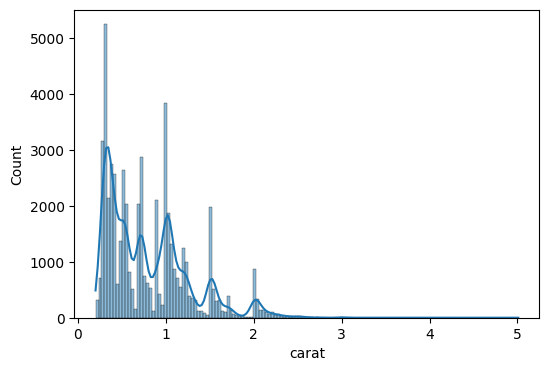

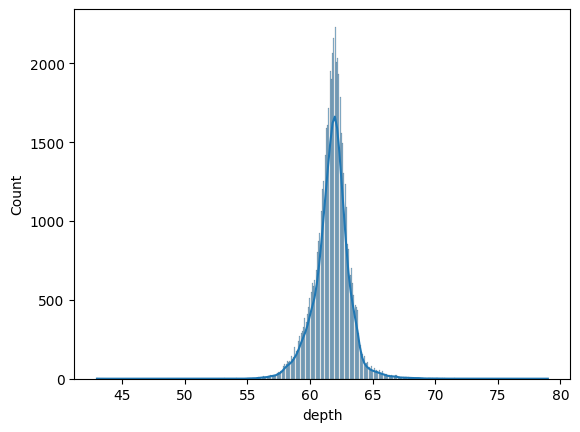

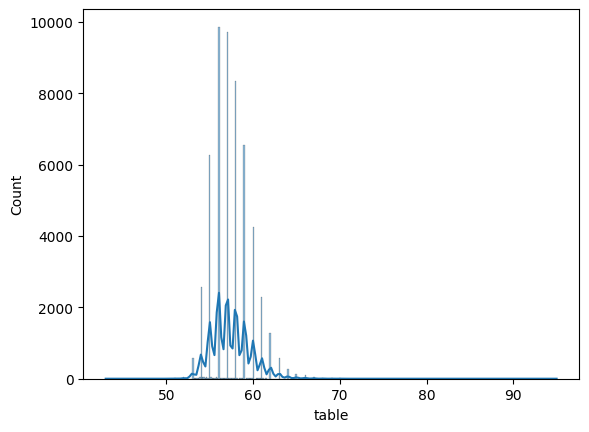

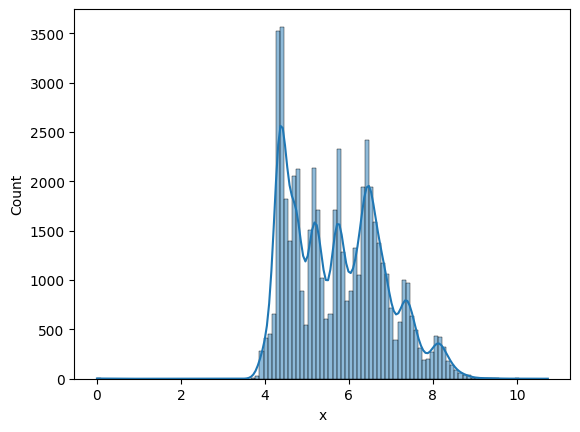

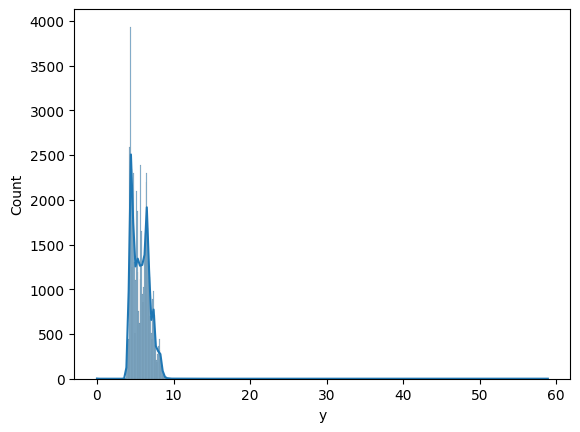

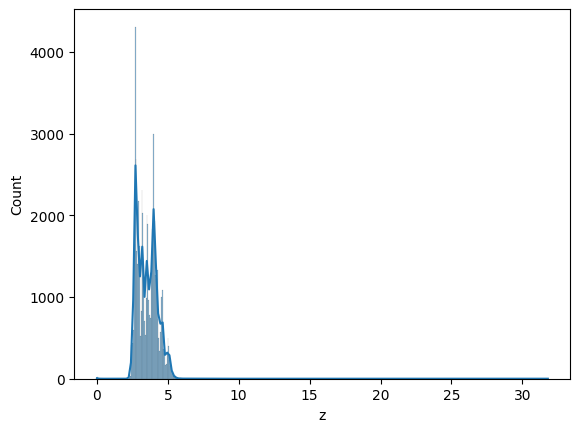

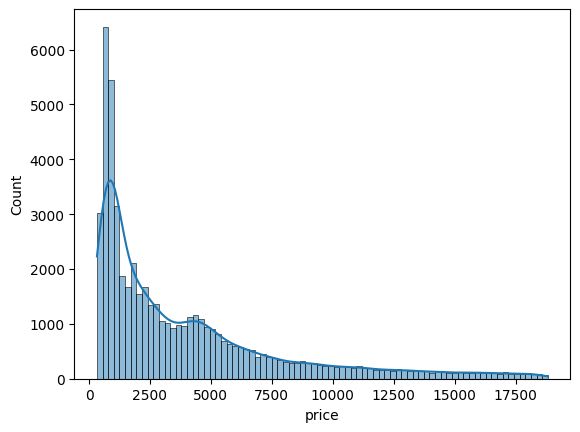

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))


for col in numerical_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

In [29]:
# categorical data
# assignment is you have to take all the categorical col and you need to plot either bar plot or count

<Axes: >

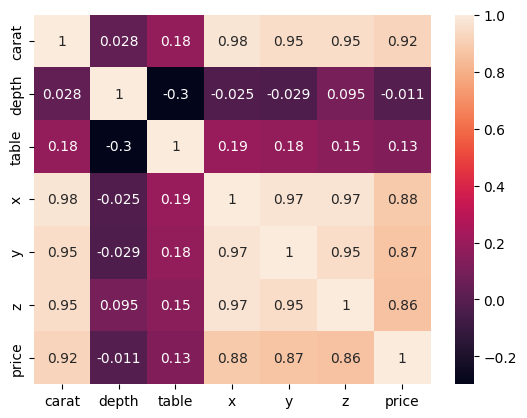

In [30]:
sns.heatmap(data[numerical_columns].corr(),annot=True)

In [31]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [32]:
# encoding

data["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [33]:
data["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [34]:
data["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [35]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [36]:
data["cut"]=data["cut"].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

In [37]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,5,2,2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,4,2,3,59.8,61.0,3.89,3.84,2.31,326
2,0.23,2,2,5,56.9,65.0,4.05,4.07,2.31,327
3,0.29,4,6,4,62.4,58.0,4.20,4.23,2.63,334
4,0.31,2,7,2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,1,3,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,2,1,3,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,3,1,3,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,4,5,2,61.0,58.0,6.15,6.12,3.74,2757
